<a href="https://colab.research.google.com/github/tgieruc/Noise2Noise_fromScratch/blob/main/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.4
    Uninstalling gdown-4.6.4:
      Successfully uninstalled gdown-4.6.4


In [2]:
!git clone https://github.com/tgieruc/Noise2Noise_fromScratch

Cloning into 'Noise2Noise_fromScratch'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 15 (delta 4), reused 8 (delta 2), pack-reused 0
Unpacking objects: 100% (15/15), 73.79 KiB | 5.68 MiB/s, done.


In [2]:
%cd Noise2Noise_fromScratch/
!gdown 1bL4nZBwNs68WAuix3cq-LJZ7QrNIYWH6 # train data
!gdown 12nFadfp-uyiE8xtc3wFl9sNBZ_8EpT6m # val data

/content/Noise2Noise_fromScratch
Downloading...
From: https://drive.google.com/uc?id=1bL4nZBwNs68WAuix3cq-LJZ7QrNIYWH6
To: /content/Noise2Noise_fromScratch/train_data.pkl
100% 307M/307M [00:01<00:00, 168MB/s]
Downloading...
From: https://drive.google.com/uc?id=12nFadfp-uyiE8xtc3wFl9sNBZ_8EpT6m
To: /content/Noise2Noise_fromScratch/val_data.pkl
100% 6.14M/6.14M [00:00<00:00, 110MB/s]


In [3]:
from model import Model

import torch
import numpy as np
import torchvision.transforms as transforms

from matplotlib import pyplot as plt    
torch.seed(1337)
torch.set_grad_enabled(False)

In [4]:
def display_rgb(img):
    plt.imshow(img.permute(1,2,0))
    plt.show()

def psnr_eval(model, noised, ground_truth, must_randomize=True):
    device = model.device
    def psnr(denoised, ground_truth):
        mse = torch.mean((denoised.cpu() - ground_truth.cpu()) ** 2)
        return -10 * torch.log10(mse + 10 ** -8)
    clean_imgs = ground_truth.clone().to(device)
    noised = noised.float().to(device)
    ground_truth = ground_truth.float().to(device)
    denoised = noised.clone().to(device)

    

    for i in range(len(noised)):
        denoised[i] = (model.predict(noised[i].unsqueeze(0)) / 255).cpu().detach()


    psnr_result = psnr(denoised, (ground_truth / 255)).item()
    print(f'PSNR result: {psnr_result}dB')

    nb_images = 3

    f, axarr = plt.subplots(nb_images, 3)

    if must_randomize:
        nb_index = np.random.choice(len(noised), nb_images)
    else:
        nb_index = np.arange(nb_images)
    axarr[0, 0].set_title("Noisy Images")
    axarr[0, 1].set_title("Denoised")
    axarr[0, 2].set_title("Ground Truth")

    for i, index in enumerate(nb_index):
        axarr[i, 0].imshow(noised[index].permute(1,2,0).int().cpu() )
        axarr[i,0].get_yaxis().set_visible(False)
        axarr[i,0].get_xaxis().set_visible(False)
        axarr[i, 1].imshow(denoised[index].cpu().detach().permute(1,2,0).cpu() )
        axarr[i, 1].get_yaxis().set_visible(False)
        axarr[i, 1].get_xaxis().set_visible(False)
        axarr[i, 2].imshow(clean_imgs[index].permute(1,2,0).cpu())
        axarr[i, 2].get_yaxis().set_visible(False)
        axarr[i, 2].get_xaxis().set_visible(False)
    plt.show()


In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f'The model will be loaded on the {"GPU" if device == "cuda" else "cpu"}.')

noisy_imgs_1, noisy_imgs_2 = torch.load('train_data.pkl')
noisy_imgs, clean_imgs = torch.load('val_data.pkl')

The model will be loaded on the GPU.


In [8]:
# Create a model
model = Model()
model.cuda()

In [ ]:
model.optimizer.lr = 1e-3
model.optimizer.momentum = 0.8
# train the model 
model.train(noisy_imgs_1, noisy_imgs_2, num_epochs=30, batch_size=8)

EPOCH: 1/30


loss: 11604.8961: 100%|██████████| 6250/6250 [04:05<00:00, 25.45batch/s]


6249.0 / 6250 | loss: 11604.896113249511
EPOCH: 2/30


loss: 98.4813: 100%|██████████| 6250/6250 [04:02<00:00, 25.81batch/s]


6249.0 / 6250 | loss: 98.4812510293579
EPOCH: 3/30


loss: 8.5306: 100%|██████████| 6250/6250 [04:02<00:00, 25.78batch/s]


6249.0 / 6250 | loss: 8.530632406425475
EPOCH: 4/30


loss: 2.2261: 100%|██████████| 6250/6250 [04:04<00:00, 25.59batch/s]


6249.0 / 6250 | loss: 2.2260968552494047
EPOCH: 5/30


loss: 1.0954: 100%|██████████| 6250/6250 [04:03<00:00, 25.66batch/s]


6249.0 / 6250 | loss: 1.0954320894908904
EPOCH: 6/30


loss: 0.7369: 100%|██████████| 6250/6250 [04:01<00:00, 25.86batch/s]


6249.0 / 6250 | loss: 0.7369489511680603
EPOCH: 7/30


loss: 0.5827: 100%|██████████| 6250/6250 [04:00<00:00, 25.93batch/s]


6249.0 / 6250 | loss: 0.5827006719255448
EPOCH: 8/30


loss: 0.5087: 100%|██████████| 6250/6250 [04:04<00:00, 25.59batch/s]


6249.0 / 6250 | loss: 0.5086721673250199
EPOCH: 9/30


loss: 0.4734: 100%|██████████| 6250/6250 [04:02<00:00, 25.78batch/s]


6249.0 / 6250 | loss: 0.47343689447402953
EPOCH: 10/30


loss: 0.4523: 100%|██████████| 6250/6250 [04:06<00:00, 25.37batch/s]


6249.0 / 6250 | loss: 0.4523015215539932
EPOCH: 11/30


loss: 0.4353: 100%|██████████| 6250/6250 [04:07<00:00, 25.25batch/s]


6249.0 / 6250 | loss: 0.43534168550014496
EPOCH: 12/30


loss: 0.4208:  95%|█████████▌| 5948/6250 [03:58<00:11, 26.25batch/s]

In [ ]:
model.save('model2.pth')

PSNR result: 7.886568069458008dB


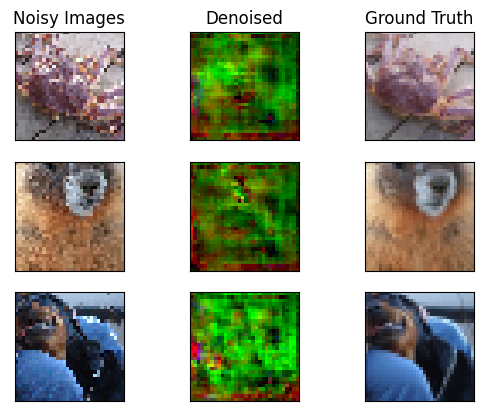

In [ ]:
#eval
psnr_eval(model, noisy_imgs, clean_imgs, must_randomize=False)


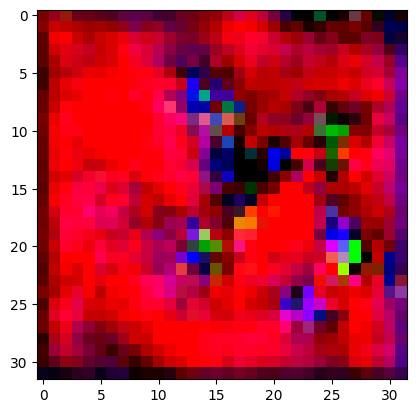

In [ ]:
plt.imshow(model.predict(noisy_imgs[0].unsqueeze(0)).int()[0].permute(1,2,0))